# <center> R2.08 - Statistique descriptive <br> TP 1 bis - Description unidimensionnelle </center>

<center> Eléments de correction - A. Ridard </center>

L'objectif est de reprendre le TP1, mais avec Python cette fois !

**Deux documents pouvant être utiles :**
-  [<font style="color:blue">Une (très) courte introduction à Python</font>](http://math-ridard.fr/wp-content/contenu_wp/ens_iut/Intro_Python.pdf)
- [<font style="color:blue">Un aide-mémoire complet</font>](http://math-ridard.fr/wp-content/contenu_wp/ens_iut/Memento_Pointal.pdf)

**La référence présentée en cours :** 
-  [<font style="color:blue">Le GitHub du livre "Python pour le data scientist"</font>](https://github.com/emjako/pythondatascientist)

## Importations pour ce TP

In [199]:
# importation des packages
import numpy as np
import pandas as pd
import seaborn as sns

# importation des modules
import matplotlib.pyplot as plt
import scipy.stats as sps

import warnings
warnings.filterwarnings('ignore')

> Charger les données du fichier **TP1_Data.xslx** dans un DataFrame.

In [170]:
# importation du fichier Excel

data = pd.read_excel("TP1_Data.xlsx", sheet_name = "Reponses")
data.head()

,id_etudiant,specialite_ensibs,dpt_entreprise,dpt_lycee,bac,mention_bac,note_maths_bac,postbac,dpt_postbac,gpa_maths_crypto,gpa_protocoles_crypto
0,9,CyberDef,56.0,35,Bac S,Assez bien,Entre 10 et 12 (exclus),DUT R&T,35,3.5,3.45
1,10,CyberDef,22.0,22,Bac S,Assez bien,Entre 10 et 12 (exclus),DUT INFO,22,3.0,3.50
2,14,CyberDef,35.0,60,Bac S,Bien,Entre 10 et 12 (exclus),DUT INFO,56,0.0,3.40
3,19,CyberDef,46.0,7,Bac S,Passable,Entre 10 et 12 (exclus),DUT R&T,74,2.0,3.00
4,25,CyberLog,NaN,90,Bac S,Bien,Entre 10 et 12 (exclus),Prépa concours (CPGE),67,4.0,3.85


## Représentations graphiques

*Pour établir les différentes distributions, on pourra utiliser la méthode **.groupby()** (cf. section 4.5 du livre) équivalente au regroupement en SQL.*

**Représenter graphiquement**, avec le diagramme le plus adapté (cf. section 5 du livre), la **distribution** :

> des trois spécialités

In [171]:
# on calcule la distribution avec .groupby() et .count()

df_dist_spe = data.groupby("specialite_ensibs")[["id_etudiant"]].count()

# on renomme la colonne (à la main) pour une meilleure lisibilité du contenu (résultat d'une fonction de groupe)
# on verra un moyen automatique plus tard avec la méthode .agg()

df_dist_spe = df_dist_spe.rename(columns={"id_etudiant":"nb_etudiant"})
df_dist_spe

,nb_etudiant
specialite_ensibs,
CyberData,15
CyberDef,52
CyberLog,26


<AxesSubplot:xlabel='specialite_ensibs'>

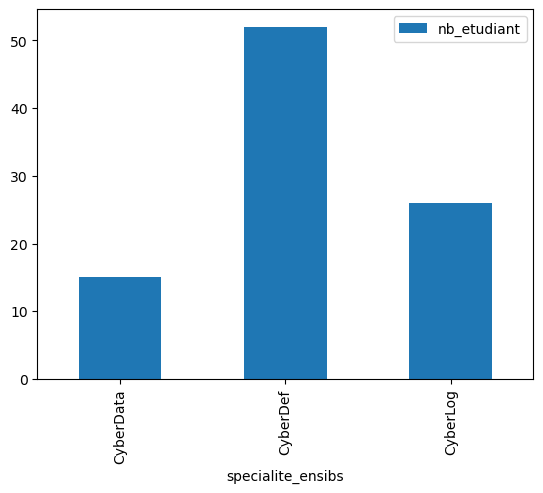

In [172]:
# on représente graphiquement la distribution avec la méthode plot() de la classe DataFrame

df_dist_spe.plot(kind="bar")

<AxesSubplot:ylabel='nb_etudiant'>

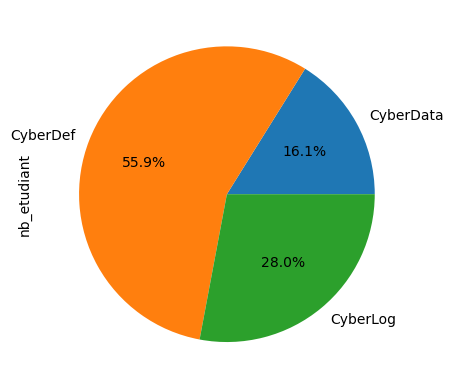

In [173]:
# on représente graphiquement la distribution avec la méthode plot() de la classe DataFrame

df_dist_spe["nb_etudiant"].plot(kind="pie", autopct='%1.1f%%')

> des bacs **toute spécialité confondue**

In [174]:
# Tableau

df_dist_bac = data.groupby("bac")[["id_etudiant"]].count()
df_dist_bac = df_dist_bac.rename(columns={"id_etudiant":"nb_etudiant"})
df_dist_bac

,nb_etudiant
bac,
Bac ES,2
Bac Pro,3
Bac S,80
Bac STHR,1
Bac STI2D,7


<AxesSubplot:ylabel='nb_etudiant'>

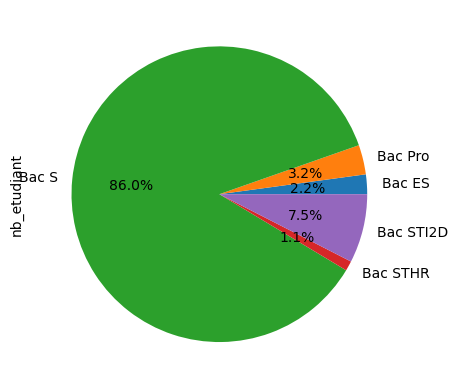

In [175]:
# on représente graphiquement la distribution avec la méthode plot() de la classe DataFrame

df_dist_bac["nb_etudiant"].plot(kind="pie", autopct='%1.1f%%')

> des bacs pour chacune des spécialités

In [176]:
# on regroupe selon deux variables (d'abord le bac, puis la spé) et on place le 2ème niveau en colonnes avec unstack()

df_dist_spe_bac = data.groupby(["bac","specialite_ensibs"])[["id_etudiant"]].count().unstack()

df_dist_spe_bac = df_dist_spe_bac.rename(columns={"id_etudiant":"nb_etudiant"})
df_dist_spe_bac

nb_etudiant                  
specialite_ensibs   CyberData CyberDef CyberLog
bac                                            
Bac ES                    1.0      NaN      1.0
Bac Pro                   NaN      3.0      NaN
Bac S                    14.0     42.0     24.0
Bac STHR                  NaN      1.0      NaN
Bac STI2D                 NaN      6.0      1.0

<AxesSubplot:xlabel='bac'>

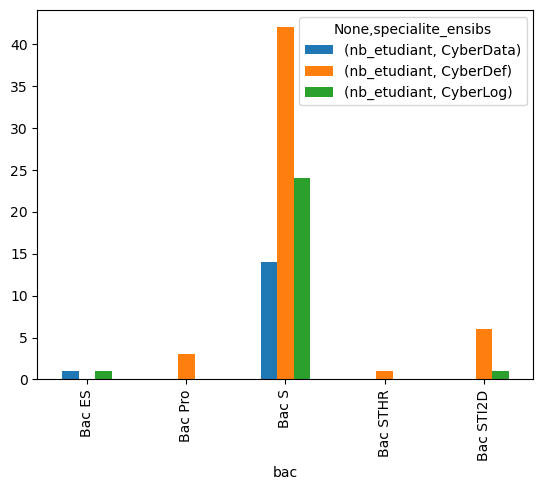

In [177]:
# on représente graphiquement les distributions avec la méthode plot() de la classe DataFrame

df_dist_spe_bac.plot(kind="bar")

> des mentions **au bac S**

In [178]:
# Tableau

# on restreint au bac S
data_S = data[data["bac"]=="Bac S"]

# on regroupe et on compte
df_dist_mention_S = data_S.groupby("mention_bac")[["id_etudiant"]].count()
df_dist_mention_S = df_dist_mention_S.rename(columns={"id_etudiant":"nb_etudiant"})

# on réordonne les index (lignes) qui sont ordonnés dans l'ordre alphabétique par défaut
df_dist_mention_S = df_dist_mention_S.reindex(index=["Passable","Assez bien","Bien", "Très bien"])

df_dist_mention_S

,nb_etudiant
mention_bac,
Passable,8
Assez bien,37
Bien,27
Très bien,8


<AxesSubplot:xlabel='mention_bac'>

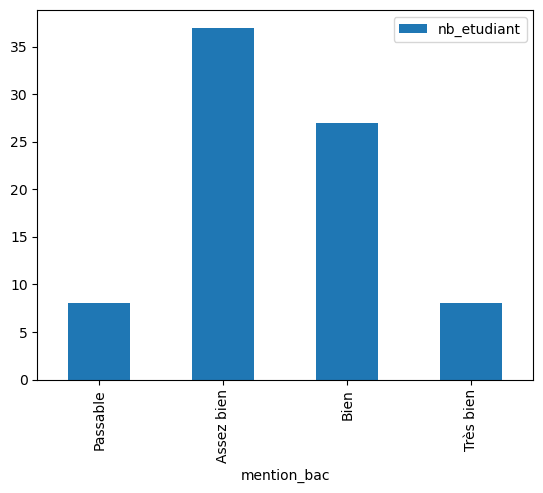

In [179]:
# on représente graphiquement la distribution avec la méthode plot() de la classe DataFrame

df_dist_mention_S.plot(kind="bar")

> des mentions **au bac S** pour chacune des spécialités

In [180]:
# on regroupe selon deux variables et on place le 2ème niveau en colonnes
df_dist_spe_mentionBac_S = data.groupby(["mention_bac","specialite_ensibs"])[["id_etudiant"]].count().unstack()

df_dist_spe_mentionBac_S = df_dist_spe_mentionBac_S.rename(columns={"id_etudiant":"nb_etudiant"})
df_dist_spe_mentionBac_S = df_dist_spe_mentionBac_S.reindex(index=["Passable","Assez bien","Bien", "Très bien"])
df_dist_spe_mentionBac_S


nb_etudiant                  
specialite_ensibs   CyberData CyberDef CyberLog
mention_bac                                    
Passable                    1        5        2
Assez bien                  8       18       14
Bien                        4       19        7
Très bien                   2       10        3

<AxesSubplot:xlabel='mention_bac'>

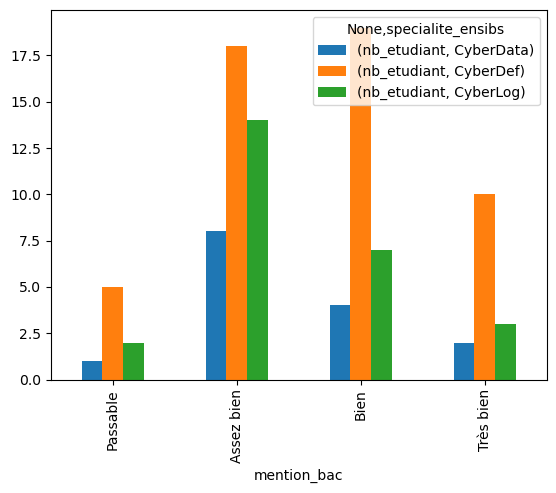

In [181]:
# on représente graphiquement les distributions avec la méthode plot() de la classe DataFrame

df_dist_spe_mentionBac_S.plot(kind="bar")

> des formations postbac

In [186]:
# Réponse

> des formations postbac pour chacune des spécialités

In [186]:
# Réponse

> des formations postbac pour chacune des mentions **au bac S**

In [186]:
# Réponse

> des départements du lycée

In [186]:
# Réponse

> des étudiants qui n'ont pas changé de département pour leur formation postbac

In [182]:
# on commence par ajouter une colonne (dernière position par défaut)

data["memeDpt"] = data["dpt_lycee"] == data["dpt_postbac"]
data.head()

,id_etudiant,specialite_ensibs,dpt_entreprise,dpt_lycee,bac,mention_bac,note_maths_bac,postbac,dpt_postbac,gpa_maths_crypto,gpa_protocoles_crypto,memeDpt
0,9,CyberDef,56.0,35,Bac S,Assez bien,Entre 10 et 12 (exclus),DUT R&T,35,3.5,3.45,True
1,10,CyberDef,22.0,22,Bac S,Assez bien,Entre 10 et 12 (exclus),DUT INFO,22,3.0,3.50,True
2,14,CyberDef,35.0,60,Bac S,Bien,Entre 10 et 12 (exclus),DUT INFO,56,0.0,3.40,False
3,19,CyberDef,46.0,7,Bac S,Passable,Entre 10 et 12 (exclus),DUT R&T,74,2.0,3.00,False
4,25,CyberLog,NaN,90,Bac S,Bien,Entre 10 et 12 (exclus),Prépa concours (CPGE),67,4.0,3.85,False


> des notes de maths au bac

In [186]:
# Réponse

> des notes de maths au bac pour chacune des spécialités

In [186]:
# Réponse

> des notes de protocoles en cryptographie

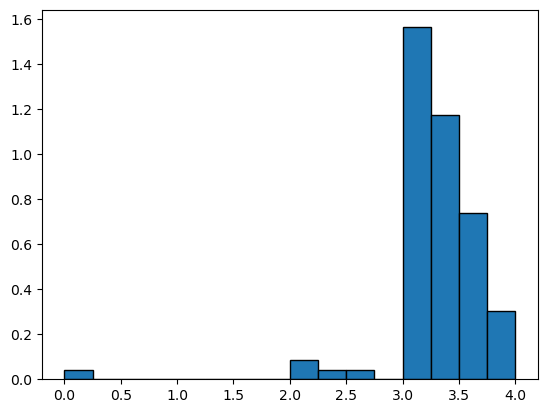

In [183]:
# Graphique

# on supprime les lignes où la note n'est pas renseignée (nan)
df_gpaProtCrypto_sansNan = data[["gpa_protocoles_crypto"]].dropna()

# les valeurs à représenter sont fournies à l'aide d'un Array créé à partir d'un DataFrame
plt.hist(np.array(df_gpaProtCrypto_sansNan), bins=nbCl, density=1, edgecolor='black')

plt.show()

> des notes de protocoles en cryptographie pour chacune des spécialités

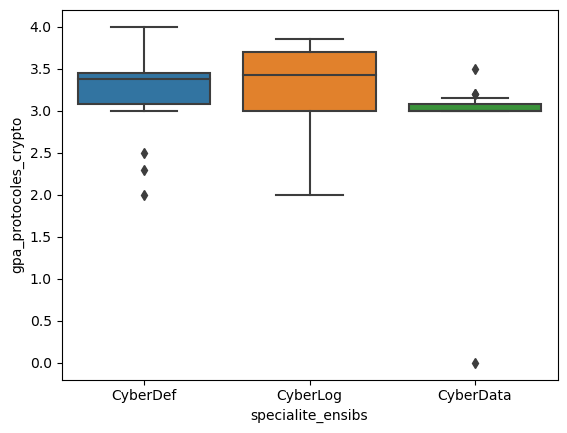

In [184]:
# Graphique
# /!\ comme le tableau n'est pas utile ici, j'ai directement affiché la représentation graphique

sns.boxplot(data["specialite_ensibs"], data["gpa_protocoles_crypto"])
plt.show()

> des notes de protocoles en cryptographie pour chacune des formations postbac

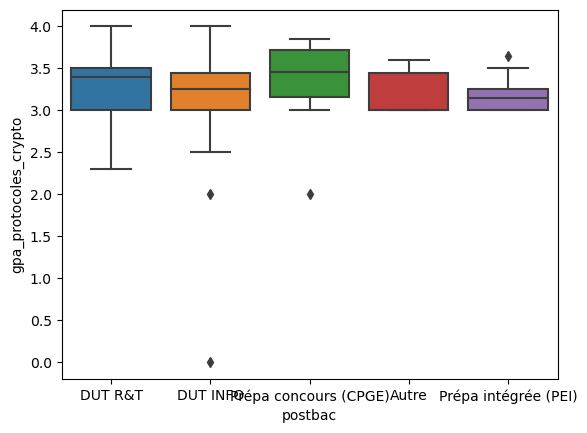

In [185]:
# Graphique
# /!\ comme le tableau n'est pas utile ici, j'ai de nouveau directement affiché la représentation graphique

sns.boxplot(data["postbac"], data["gpa_protocoles_crypto"])
plt.show()

## Indicateurs statistiques

*Là encore, on pourra utiliser la méthode **.groupby()** (cf. section 4.5 du livre) accompagnée de **.agg()** et **.apply()**.*

**Calculer** :

> le nombre d'étudiants pour chacune des spécialités

In [186]:
# Réponse

> la moyenne et l'écart-type des notes de protocoles en cryptographie

In [187]:
# Réponse

> la moyenne et l'écart-type des notes de protocoles en cryptographie pour chacune des spécialités

In [188]:
# Réponse

> la moyenne et l'écart-type des notes de protocoles en cryptographie pour chacune des formations postbac

In [189]:
# Réponse

> la moyenne des extrêmes et l'étendue des notes de maths pour la crypto

In [190]:
# Réponse

> la moyenne des extrêmes et l'étendue des notes de maths pour la crypto pour chacune des spécialités

In [191]:
# Réponse

> la moyenne des extrêmes et l'étendue des notes de maths pour la crypto pour chacune des formations postbac

In [192]:
# Réponse

> la moyenne "approchée" et l'écart-type "approché" des notes de maths au bac

In [193]:
# Réponse

> la moyenne "approchée" et l'écart-type "approché" des notes de maths au bac pour chacune des spécialités

In [194]:
# Réponse

## Des questions supplémentaires (non facultatives)

*Pour les questions suivantes, on pourra se reporter à la section 4.4 du livre*

> Afficher les différents indicateurs, à l'aide de la méthode **.describe()**, pour les notes de protocoles en crypto et celles de maths pour la crypto

In [195]:
# Réponse

> Afficher ces différents indicateurs pour les notes de protocoles en crypto dans chacune des spécialités

In [196]:
# Réponse

> Afficher ces différents indicateurs pour les notes de protocoles en crypto dans chacune des formations postbac en se restreignant à CyberDef

In [197]:
# Réponse

> Afficher le 1er et le 9ème décile, le coefficient d'asymétrie et celui d'applatissement pour les notes de protocoles en crypto

In [198]:
# Réponse